<a href="https://colab.research.google.com/github/melaabenteupa/bigdata/blob/main/TP_BIGDATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploración de Datos (EDA)**

el analisis EDA es sumamente importante al iniciar un proyecto ya que te ayuda entender los datos ,antes de aplicar ML o cualquiert itpo de analisis.

In [ ]:
#Load the required libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

# Get the data
df = pd.read_csv("twitter_training.csv", sep=',')

#View the data
df.head()

Saving twitter_training.csv to twitter_training.csv


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
#Basic information

df.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
#necesito poner nombre a columnas para trabajar mejor
df.columns = ['tweet_id', 'place', 'tweet_type', 'text']

In [ ]:
#Describe the data
df.describe()

,tweet_id
count,74681.000000
mean,6432.640149
std,3740.423819
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [ ]:
#Find the duplicates
df.duplicated().sum()

2700

In [ ]:
# Eliminar duplicados
df_sin_duplicados = df.drop_duplicates()
df_sin_duplicados.duplicated().sum()

0

In [ ]:
#Find null values
df.isnull().sum()

tweet_id        0
place           0
tweet_type      0
text          686
dtype: int64

In [ ]:
#Replace null values
df.replace(np.nan,'0',inplace = True)

#Check the changes now
df.isnull().sum()

tweet_id      0
place         0
tweet_type    0
text          0
dtype: int64

In [ ]:
df.dtypes
#para analizar tipos de datos, auqnue son pocas columnas.

tweet_id       int64
place         object
tweet_type    object
text          object
dtype: object

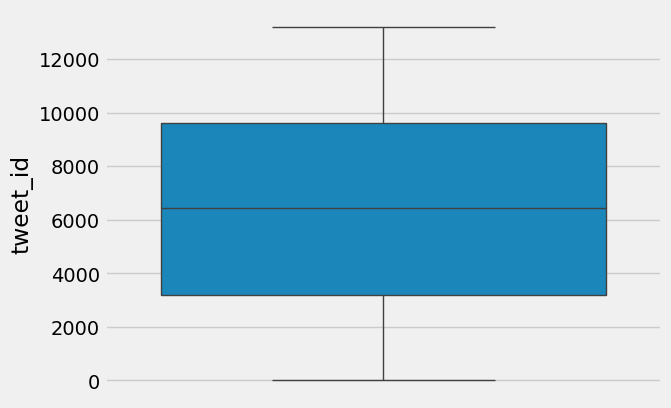

In [31]:
sns.boxplot( y=df["tweet_id"] );
plt.show()
#probablemente no sirve ya que no es un dato continuo

In [ ]:
df.head((20))

,tweet_id,place,tweet_type,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...
6,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
8,2402,Borderlands,Positive,So I spent a few hours making something for fu...
9,2402,Borderlands,Positive,2010 So I spent a few hours making something f...


# **Preprocesamiento de Datos**

In [ ]:
#preprocesamiento
# Función para limpiar los tweets
import re
def limpiar_tweet(text):
    tweet = re.sub(r'http\S+', '',text )  # Eliminar URLs
    tweet = re.sub(r'@\w+', '', text)     # Eliminar menciones
    tweet = re.sub(r'#', '', text)        # Eliminar hashtag symbol
    tweet = re.sub(r'[^\w\s]', '', text)  # Eliminar puntuación
    tweet = text.lower()                  # Convertir a minúsculas
    return tweet

# Aplicar la función de limpieza a cada tweet y crea unna columna solo tweet limpio
#no olvidar esa columna opatra trabajar con lo limpio.
df['tweet_limpio'] = df['text'].apply(limpiar_tweet)

In [ ]:
df.head()
#visualizar nuevos datos y columnas

,tweet_id,place,tweet_type,text,tweet_limpio
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...


In [ ]:
#analisis sentimiento
#importamos librerias
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
#from langdetect import detect
import string
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

# **Extracción de Características**

In [ ]:
#extraer caracteristicasc con mi texto sucio, yaque abajo con el limpio no teine sentido,
# Extraccion de caracteristicas :
#hashtags extraccion
def extraer_hashtags(tweet):
    return re.findall(r'#(\w+)', tweet)

# emoticones extraccion
def extraer_emoticones(tweet):
    emoticones = [':)', ':(',';)','XD','<3']
    encontrados = [emoticon for emoticon in emoticones if emoticon in tweet]
    return encontrados

    # Aplicar las funciones y crear nuevas columnas
#df['hashtags'] = df['tweet'].apply(extraer_hashtags)
#df['emoticones'] = df['tweet'].apply(extraer_emoticones)

# Imprimir los resultados
print(df[['hashtags', 'emoticones']])
# no hay diferencia con el de abajo , no se porque


KeyError: "None of [Index(['hashtags', 'emoticones'], dtype='object')] are in the [columns]"

In [ ]:
# Extraccion de caracteristicas :
#hashtags extraccion
def extraer_hashtags(tweet_limpio):
    return re.findall(r'#(\w+)', tweet_limpio)

# emoticones extraccion
def extraer_emoticones(tweet_limpio):
    emoticones = [':)', ':(',';)','XD','<3']
    encontrados = [emoticon for emoticon in emoticones if emoticon in tweet_limpio]
    return encontrados

    # Aplicar las funciones y crear nuevas columnas
df['hashtags'] = df['tweet_limpio'].apply(extraer_hashtags)
df['emoticones'] = df['tweet_limpio'].apply(extraer_emoticones)

# Imprimir los resultados
print(df[['hashtags', 'emoticones']])



      hashtags emoticones
0           []         []
1           []         []
2           []         []
3           []         []
4           []         []
...        ...        ...
74676       []         []
74677       []         []
74678       []         []
74679       []         []
74680       []         []

[74681 rows x 2 columns]


# **Entrenamiento del Modelo**

Naive Bayes


In [ ]:
#dividir mi conjunto de datos .
#Crear las bases de entrenamiento y pruebas

from sklearn.model_selection import train_test_split,cross_val_score

X = df['tweet_limpio']
y = df['tweet_type']

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
x_train.head(2)
#mis datos de entrenamiento, los dos primeron, uno con caracter ??

8581     my mercy @ ambarkortiz was so mad at me for ma...
71533    i must say that for every moment of fun i have...
Name: tweet_limpio, dtype: object

In [ ]:
x_test.head(2)

34877    went to go in george's room to find his door w...
21704           yo this looks lit! team:go/overwatch combo
Name: tweet_limpio, dtype: object

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# de todas fomras no puedo escalar porque es object

In [ ]:
#entrenar el modelo con el conjunto de entrenamiento
#importando una libreia
from sklearn.feature_extraction.text import CountVectorizer # Import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer



#### usar pipeline???
#me permite automatizar el flujo de trabajo
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('nb', MultinomialNB())
])

In [ ]:
#ahora si puedo entrenar el modelo
pipeline.fit(x_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('nb', MultinomialNB())])

In [ ]:
#modelo entrenado en teoria, siguiente paso evaluar el modelo.
from sklearn import metrics

y_pred = pipeline.predict(x_test)  # Get the predicted labels
print("Accuracy (Naive Bayes):", metrics.accuracy_score(y_pred,y_pred))
print("Classification Report (Naive Bayes):\n", metrics.classification_report(y_test, y_pred))

Accuracy (Naive Bayes): 1.0
Classification Report (Naive Bayes):
               precision    recall  f1-score   support

  Irrelevant       0.73      0.32      0.44      2661
    Negative       0.61      0.82      0.70      4471
     Neutral       0.67      0.53      0.59      3551
    Positive       0.62      0.74      0.68      4254

    accuracy                           0.64     14937
   macro avg       0.66      0.60      0.60     14937
weighted avg       0.65      0.64      0.62     14937



####probable overfitting porque accuracy 1


In [ ]:
#se puede hacer validacion cruzada ????

#### tengo que convertir mi type a actegory para poder hacer

if not df['tweet_type'].dtype.name == 'category':
    df['tweet_type'] = df['tweet_type'].astype('category')

scores = cross_val_score(pipeline, df['text'], df['tweet_type'].cat.codes, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())



Cross-validation scores: [0.52018478 0.45179432 0.40131227 0.40747188 0.51345742]
Mean cross-validation score: 0.4588441325016596


In [ ]:
##metricas y esas cosas
from sklearn.metrics import  precision_score,f1_score
precision = precision_score(y_test, y_pred, average='weighted')
exactitud = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Mostrar las métricas
print(f'Precisión: {precision}')
print(f'Exactitud: {exactitud}')
print(f'F1-score: {f1}')

Precisión: 0.6511480614700865
Exactitud: 0.6368748744727857
F1-score: 0.6215461661732026


# **conclusion**

el modelo de datos inicio con un primer resultado de accuracy de 1 punto , lo cual asi como es un buen reusltado tambien puede ser malo ya que es un posible overfitting, por otro lado al realizar el analisis de crossvalidation score lo cual varia entre 0.40 y 0.52 indica que hay variabilidad en el rendimineto del modelo en diferentes conjuntos de datos, en cuanto al promedio representa que 0.45 es la estimacion del rendimiento general.
Una precisión del 65% indica que el modelo tiene una tasa razonablemente alta de identificar correctamente las instancias positivas.
Una exactitud del 64% muestra que el modelo tiene un rendimiento general decente.
Un F1-score del 62% indica un equilibrio entre precisión y exhaustividad.